# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)


# Example research question
How have the win percentages for the four major Detroit sports teams (The Detroit Pistons, The Red
Wings, The Detroit Tigers, and The Detroit Lions) change over the last forty years?


In [2]:
import pandas as pd
from IPython.display import display, HTML


# My Research Question - How have the number of medals of Brazil changed in the Olympics over the years 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Link para o dataset - https://www.kaggle.com/the-guardian/olympic-games?select=summer.csv

In [4]:
#Read the file from a csv 
summer0 = pd.read_csv('summer.csv')

#Drop columns that won`t be necessary for our analysis 
summer = summer0.drop(['Sport','Athlete','Event','Discipline','Gender'], axis=1)

summer.head()


,Year,City,Country,Medal
0,1896,Athens,HUN,Gold
1,1896,Athens,AUT,Silver
2,1896,Athens,GRE,Bronze
3,1896,Athens,GRE,Gold
4,1896,Athens,GRE,Silver


In [5]:
summer.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [6]:
#Using groupby function to see how many medals each country won per year
medals_country = summer.groupby(['Country','Year']).count().drop('City', axis=1)
medals_country.head(5)

Medal
Country Year       
AFG     2008      1
        2012      1
AHO     1988      1
ALG     1984      2
        1992      2

In [7]:
#Creating a list with all the Olympics covered in this Dataset 
years = list(summer.drop_duplicates(subset=['Year'])['Year'].sort_values())  #first year- 1896    last year-2012

#How many Olympics the dataset covers?
len(years); #27 Olympic Games 

#List of all countrys 
countries = list(medals_country.index.levels[0]);

In [8]:
#Medals of Brazil. The first medals were given in 1920, but the first Olympic Games from the modern era were in 1896.
medals_brazil = (summer[summer['Country']=="BRA"]
                 .groupby('Year').count().drop(['City','Country'], axis=1))

medals_brazil.head();

In [9]:
# How the number of gold medals changed over the years.
medals_brazil_gold = (summer[(summer['Country'] =='BRA') & (summer['Medal'] == 'Gold' )]
                      .groupby('Year').count().drop(['City','Country'], axis=1))
medals_brazil_gold;

In [10]:
# How the number of silver medals changed over the years.
medals_brazil_silver = (summer[(summer['Country'] =='BRA') & (summer['Medal'] == 'Silver' )]
                      .groupby('Year').count().drop(['City','Country'], axis=1))
medals_brazil_silver;

In [11]:
# How the number of bronze medals changed over the years.
medals_brazil_bronze = (summer[(summer['Country'] =='BRA') & (summer['Medal'] == 'Bronze' )]
                      .groupby('Year').count().drop(['City','Country'], axis=1))
medals_brazil_bronze.head();

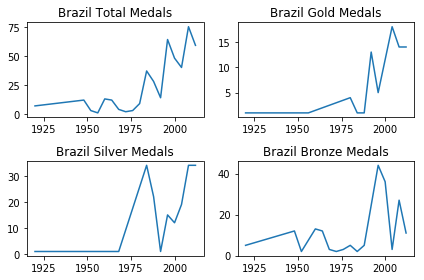

In [12]:
# Plotting each chart side by side  
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

#Total
ax1.plot(medals_brazil.index, medals_brazil['Medal'])
ax1.set_title('Brazil Total Medals')

#Gold
ax2.plot(medals_brazil_gold.index, medals_brazil_gold['Medal'])
ax2.set_title('Brazil Gold Medals')

#Silver
ax3.plot(medals_brazil_silver.index, medals_brazil_silver['Medal'])
ax3.set_title('Brazil Silver Medals')

#Bronze
ax4.plot(medals_brazil_bronze.index, medals_brazil_bronze['Medal'])
ax4.set_title('Brazil Bronze Medals')


fig.tight_layout()

plt.show()

In [13]:
# Since the first medal came only in 1920 but the first modern Olympics happened in 1896, 
# we will create a new dataframe with all the years.
all_dates = pd.DataFrame(years)
all_dates.columns = ['Year']




In [14]:
# Merging  the dataframe with all dates and the one with only the years that Brazil won at least one medal.
all_dates_medals = pd.merge(all_dates, medals_brazil, left_on='Year', right_index=True, how='outer').fillna(0)

all_dates_medals.head(10)


lista = list(all_dates_medals['Year'])

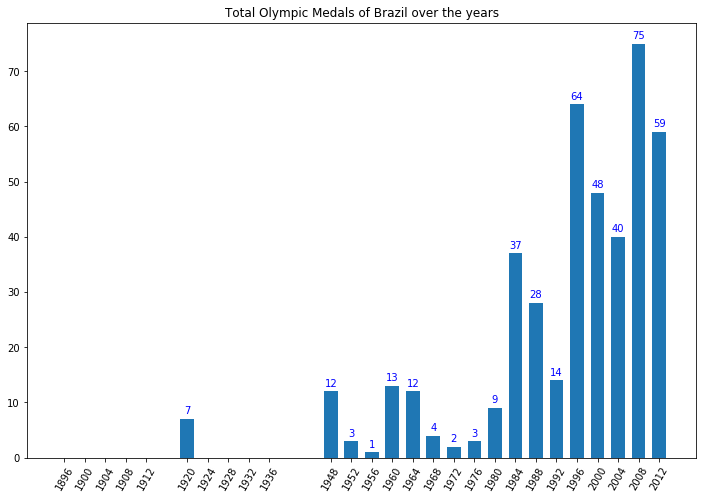

In [15]:
# Creating a bar chart with the total medals of Brazil over the years
plt.figure(figsize = (12,8))
plt.bar(all_dates_medals['Year'], all_dates_medals['Medal'], width=2.7)
plt.title('Total Olympic Medals of Brazil over the years')
plt.xticks(all_dates_medals['Year'], rotation=60)    

#Showing the data label for each bar 
for i, v in enumerate(all_dates_medals['Medal']):
    if all_dates_medals['Medal'][i] != 0:
        plt.text(all_dates_medals['Year'][i], v+0.9, str(int(v)), color='blue', ha='center')
    else:
        pass

plt.show()

In [16]:
# Using groupby to make a more precise analysis. Dividing the number of gold, silver, and bronze medals.
# The reset index function is used to make it easier to make a filter on each type of medal.
gsb_brazil = (summer0[summer0['Country'] == 'BRA']
              .groupby(['Medal','Year'])
              .count()
              .reset_index()
              .rename(columns={'City': 'Number'}))
              
#There was having a problem using the drop function with the others functions above, so to solve this problem 
# the following line of code was made.
gsb_brazil = gsb_brazil.drop(gsb_brazil.columns[3:], axis=1)

gsb_brazil.head(5)


,Medal,Year,Number
0,Bronze,1920,5
1,Bronze,1948,12
2,Bronze,1952,2
3,Bronze,1960,13
4,Bronze,1964,12


In [17]:
#gold medals from Brazil
g_brazil = gsb_brazil[gsb_brazil['Medal']=='Gold']


#silver medals from Brazil
s_brazil = gsb_brazil[gsb_brazil['Medal']=='Silver']


#Bronze medals from Brazil
b_brazil = gsb_brazil[gsb_brazil['Medal']=='Bronze']


In [18]:
#Adding all the years to each new df
#merging df all_dates with each one that we created for each medal (g_brazil, s_brazil, b_brazil)

#gold
g_brazil = (pd.merge(all_dates, g_brazil, left_on='Year', right_on='Year', how='outer')
            .fillna(0))

g_brazil['Medal'] = 'Gold'
g_brazil =  g_brazil.drop(g_brazil.iloc[:,3:], axis=1)

#silver
s_brazil = (pd.merge(all_dates, s_brazil, left_on='Year', right_on='Year', how='outer')
            .fillna(0))

s_brazil['Medal'] = 'Silver'
s_brazil =  s_brazil.drop(s_brazil.iloc[:,3:], axis=1)

#Bronze
b_brazil = (pd.merge(all_dates, b_brazil, left_on='Year', right_on='Year', how='outer')
            .fillna(0))

b_brazil['Medal'] = 'Bronze'
b_brazil =  b_brazil.drop(b_brazil.iloc[:,3:], axis=1)



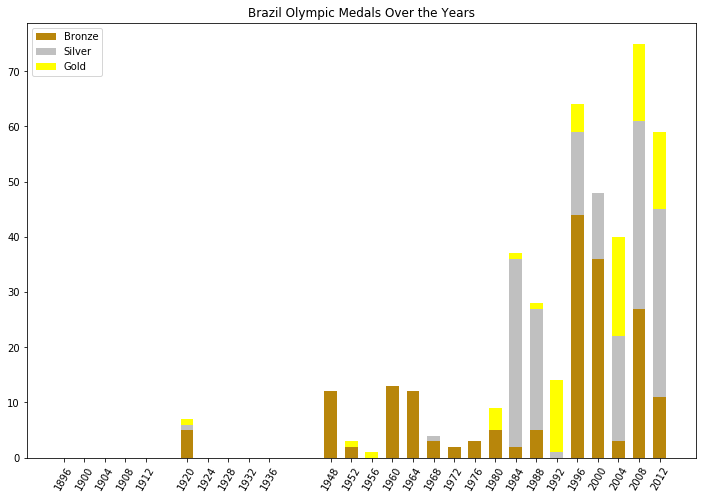

In [19]:
# Plotting the data from each type of medal in an stacked bar chart.
fig, ax = plt.subplots(figsize = (12,8))


ax.bar(b_brazil['Year'], b_brazil['Number'], label='Bronze', width=2.5, color= 'darkgoldenrod')
ax.bar(s_brazil['Year'], s_brazil['Number'], bottom= np.array(b_brazil['Number']), label='Silver', width=2.5, color= 'silver')
ax.bar(g_brazil['Year'], g_brazil['Number'], bottom= np.array(b_brazil['Number'])+np.array(s_brazil['Number']), label='Gold', width=2.5, color='yellow')



ax.set_title('Brazil Olympic Medals Over the Years')
ax.set_xticks(all_dates['Year'])
ax.set_xticklabels(all_dates['Year'], rotation = 60)
ax.legend()

plt.show()




fig, ax = plt.subplots(figsize = (12,8))


ax.bar(b_brazil['Year'], b_brazil['Number'], label='Bronze', width=2.5, color= 'darkgoldenrod')
ax.bar(s_brazil['Year'], s_brazil['Number'], bottom= np.array(b_brazil['Number']), label='Silver', width=2.5, color= 'silver')
ax.bar(g_brazil['Year'], g_brazil['Number'], bottom= np.array(b_brazil['Number'])+np.array(s_brazil['Number']), label='Gold', width=2.5, color='yellow')



ax.set_title('Brazil Olympic Medals Over the Years')
ax.set_xticks(all_dates['Year'])
ax.set_xticklabels(all_dates['Year'], rotation = 90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.legend()

plt.show()



In [20]:
#Creating df with the data divided by each medal side by side 
gsb_side = pd.merge(g_brazil, s_brazil, left_on='Year', right_on='Year', how='outer')
gsb_side = (pd.merge(gsb_side, b_brazil, left_on='Year', right_on='Year',how='outer')
            .rename(columns={'Number_x':'Number_gold', 'Number_y':'Number_silver', 'Number':'Number_bronze'})
            .drop(['Medal_x','Medal_y','Medal'], axis=1))

In [21]:
gsb_side.head()

,Year,Number_gold,Number_silver,Number_bronze
0,1896,0.0,0.0,0.0
1,1900,0.0,0.0,0.0
2,1904,0.0,0.0,0.0
3,1908,0.0,0.0,0.0
4,1912,0.0,0.0,0.0


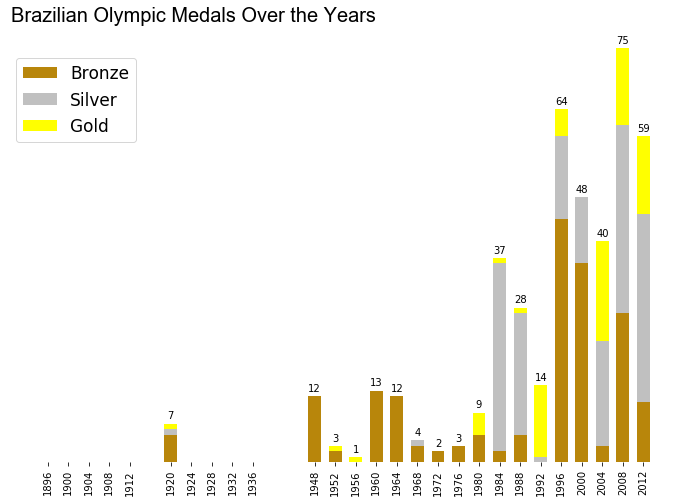

In [37]:
# Improving the stacked bar by removing what is not necessary.
fig, ax = plt.subplots(figsize = (12,8))


ax.bar(gsb_side['Year'], gsb_side['Number_bronze'], label='Bronze', width=2.5, color= 'darkgoldenrod')
ax.bar(gsb_side['Year'], gsb_side['Number_silver'], bottom= np.array(gsb_side['Number_bronze']), label='Silver', width=2.5, color= 'silver')
ax.bar(gsb_side['Year'], gsb_side['Number_gold'], bottom= np.array(gsb_side['Number_bronze'])+np.array(gsb_side['Number_silver']), label='Gold', width=2.5, color='yellow')


ax.set_title('Brazilian Olympic Medals Over the Years', loc='left', fontdict= {'fontsize':20, 'fontname':'Arial'})
ax.set_xticks(all_dates['Year'])
ax.set_xticklabels(all_dates['Year'], rotation = 90)

#Removing the frame from our chart 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#Showing the data label for each bar 
for i, v in enumerate(all_dates_medals['Medal']):
    if all_dates_medals['Medal'][i] != 0:
        plt.text(all_dates_medals['Year'][i], v+0.9, str(int(v)), color='black', ha='center')
    else:
        pass

ax.axes.get_yaxis().set_visible(False)
    

#Increasing the size and the position of the legend 
ax.legend(bbox_to_anchor=(0.2, 0.95), bbox_transform=ax.transAxes, prop={'size': 17})

plt.savefig('final_chart.png')

plt.show()

In [23]:
def create_chart(ind):
    "Create a chart for each row of the gsb_side dataframe"
    fig, ax = plt.subplots()
    ax.bar('Gold', gsb_side.iloc[ind,1], color='yellow')
    ax.bar('Silver', gsb_side.iloc[ind,2], color='silver')
    ax.bar('Bronze', gsb_side.iloc[ind,3], color='darkgoldenrod')
    
    
    #Create value on each bar 
    if gsb_side.iloc[ind,1] != 0:
        ax.text('Gold',gsb_side.iloc[ind,1]+0.15, str(int(gsb_side.iloc[ind,1])))
    else:
        pass
    
    if gsb_side.iloc[ind,2] != 0:
        ax.text('Silver',gsb_side.iloc[ind,2]+0.15, str(int(gsb_side.iloc[ind,2])))
    else:
        pass
    
    if gsb_side.iloc[ind,3] != 0:
        ax.text('Bronze',gsb_side.iloc[ind,3]+0.1, str(int(gsb_side.iloc[ind,3])))
    else:
        pass
    
    
    #set right and top spines invisible
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title(str(gsb_side.iloc[ind,0]))
    

    plt.show()
    
    print('\n')

    

In [24]:

#for i in range(0,len(gsb_side['Year'])):
   # create_chart(i);

In [25]:
gsb_side.head()

,Year,Number_gold,Number_silver,Number_bronze
0,1896,0.0,0.0,0.0
1,1900,0.0,0.0,0.0
2,1904,0.0,0.0,0.0
3,1908,0.0,0.0,0.0
4,1912,0.0,0.0,0.0


In [26]:
#Plotting the detailed chart for each specific year 
def choose_year(ind):
    for i in range(0,len(gsb_side['Year'])):
        if ind == i:
            create_chart(i)

In [27]:
# From which sports did we win our medals 
sports = (summer0[summer0['Country']== 'BRA']
          .groupby(['Sport']).count()
          .sort_values('Event', ascending=False))

sports

,Year,City,Discipline,Athlete,Country,Gender,Event,Medal
Sport,,,,,,,,
Volleyball,130,130,130,130,130,130,130,130
Football,127,127,127,127,127,127,127,127
Basketball,60,60,60,60,60,60,60,60
Sailing,32,32,32,32,32,32,32,32
Athletics,21,21,21,21,21,21,21,21
Aquatics,19,19,19,19,19,19,19,19
Judo,19,19,19,19,19,19,19,19
Equestrian,9,9,9,9,9,9,9,9
Shooting,7,7,7,7,7,7,7,7


Since each row corresponds 

In [28]:
#Since each row of our dataframe is about a medal from an specific athlete. team sports has one medal for each athlete
# to solve this, it is necessary to remove duplicates. We are goig to remove the duplicates by the columns year, gender, event, medal 
sports_unique = (summer0[(summer0['Country'] == 'BRA')]
                 .drop_duplicates(subset=['Year', 'Gender','Event','Medal'])
                 .groupby(['Sport']).count()
                 .sort_values('Event', ascending=False))
sports_unique


,Year,City,Discipline,Athlete,Country,Gender,Event,Medal
Sport,,,,,,,,
Volleyball,20,20,20,20,20,20,20,20
Judo,19,19,19,19,19,19,19,19
Sailing,17,17,17,17,17,17,17,17
Athletics,14,14,14,14,14,14,14,14
Aquatics,13,13,13,13,13,13,13,13
Football,7,7,7,7,7,7,7,7
Basketball,5,5,5,5,5,5,5,5
Boxing,4,4,4,4,4,4,4,4
Equestrian,3,3,3,3,3,3,3,3


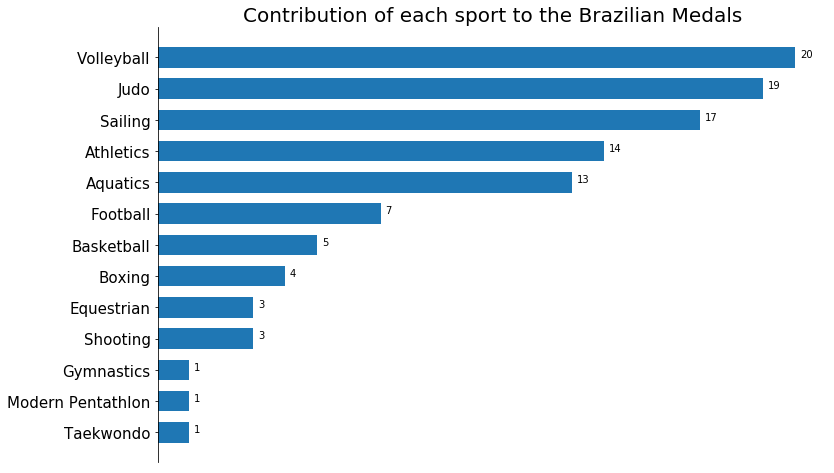

In [29]:
#Creating a chart of the contribution of each sport to the brazilian medals 
fig, ax = plt.subplots(figsize = (12,8))

ax.barh(sports_unique.index, sports_unique['Event'], height=.65)
ax.set_title('Contribution of each sport to the Brazilian Medals', fontdict={'fontsize':20})
ax.set_yticks(sports_unique.index)
ax.set_yticklabels(sports_unique.index,fontdict = {'fontsize':15})
fig.gca().invert_yaxis()

#set right, top, bottom, and xaxis invisible
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
    
    

for index, value in enumerate(sports_unique['Event']):
    plt.text(value+0.15, index, str(value))
    
    

